# Principal component analysis of omnics datasets

## Prerequisites:
* heatmapdataframe module

## Purpose:
Here, we show the user how to perfrom principal components analysis to visualize the fold-change values in reduced dimensionality. This is a great tool to determine whether the changes in your overall fold-change of omics datasets different for all experimental condition.

The sklearn package from Python already did all the math for dimensionality reduction. Though, we wanted to represent the spread of the principal components by adding confidence intervals of CI as ellispes.

For more information about PCA, refer to:
>https://en.wikipedia.org/wiki/Principal_component_analysis

In [131]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib.patches import Ellipse
from scipy.stats import sem, t

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [132]:
#PCA analysis
#Transposing
#Preprocessing/PCA analysis
#Before starting your PCAs analyis, you need to make sure that you standardized/normalize your data.
#I want to save the normalized dataframe values for PCAs, just in case we need it again.

data = pd.read_excel('heatmap_trial1.xlsx')
data = data[data.columns[1:len(data.columns)]] 

#For this analysis, you would want your protein names and accession number to 
#be your index. Alternatively, you can extract the values from all columns

heatmap_DEPs = data.set_index('protein name', drop=True)
heatmap_DEPs.head()

,A4/sp7_rep1,A4/sp7_rep2,A4/sp7_rep3,A1A4/sp7_rep1,A1A4/sp7_rep2,A1A4/sp7_rep3,A1A4/A4_rep1,A1A4/A4_rep2,A1A4/A4_rep3
protein name,,,,,,,,,
A0A0P0F6W5 Uncharacterized protein,1.565508,2.511388,1.503823,0.469317,0.755492,0.645550,-1.096192,-1.755896,-0.858273
A0A0N7I7H6 Uncharacterized protein,-1.837679,-1.778177,-2.028923,-0.097383,-0.055148,-0.294752,1.740296,1.723030,1.734171
A0A0P0FD78 Peptide ABC transporter substrate-binding protein,0.639843,0.346938,1.457745,-1.241820,-1.495386,0.074511,-1.881663,-1.842324,-1.383235
A0A0P0EW12 DNA helicase,-3.633652,-3.520165,-3.789229,-0.085482,0.066020,-1.806343,3.548170,3.586185,1.982886
A0A0P0F5R5 Glutathione S-transferase,-1.671748,-1.365054,-2.593651,2.242848,2.096559,1.318141,3.914595,3.461613,3.911792


In [133]:
PCAs_dataforfinal=heatmap_DEPs.T
PCAs_value_normalize = StandardScaler().fit_transform(PCAs_dataforfinal)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCAs_value_normalize)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['name']  = list(PCAs_dataforfinal.index)
principalDf

,principal component 1,principal component 2,name
0,-21.965224,-2.279759,A4/sp7_rep1
1,-22.889067,-3.404433,A4/sp7_rep2
2,-22.643740,-6.682766,A4/sp7_rep3
3,2.172708,9.040129,A1A4/sp7_rep1
4,1.685644,8.557100,A1A4/sp7_rep2
5,-1.848768,8.103859,A1A4/sp7_rep3
6,22.798209,-5.814171,A1A4/A4_rep1
7,23.234987,-5.172526,A1A4/A4_rep2
8,19.455249,-2.347433,A1A4/A4_rep3


In [134]:
pca.explained_variance_ratio_

array([0.79089505, 0.0927624 ])

Confidence intervals of the principal components are modeled by ellispses. The major and minor axes are modeled by the 95% confidence intervals. The directionality of the ellispes is determined by the cosine of the [0,0] position of the eigenvector.

$Center\ of\ mass\ =\ (avg(PC1),\ avg(PC2))$
$Minor\ axis\ length =\ 2* SEM_{pc1}*f((1\ +\ confidence)/2, n-1)$
$Major\ axis\ length =\ 2* SEM_{pc2}*f((1\ +\ confidence)/2, n-1)$
$where\ f(x)\ is\ a\ percent\ point\ function$

$Angle\ of\ rotation\ =\ cos(cov(PC1,\ PC2))$

In [135]:
# Modelling ellispse using eigenvalues to determine confidence interval of scatter plot. The width and the height
# of the ellispes will be 2D-distances of the confidence interval in the y and x direction.

confidence =0.95
PCA1_A4sp7 = [list(principalDf['principal component 1'])[i] for i in range(0,3)]
PCA2_A4sp7 = [list(principalDf['principal component 2'])[i] for i in range(0,3)]
cov_A1A4sp7 = np.cov(PCA1_A4sp7, PCA2_A4sp7)
lambda_A4sp7, v_A4sp7 = np.linalg.eig(cov_A4sp7)

#Finding the confidence interval for PCA1 and PCA2
n1 = len(PCA1_A4sp7)
m1 = np.mean(PCA1_A4sp7)
std_err1 = sem(PCA1_A4sp7)
h1 = std_err1 * t.ppf((1 + confidence) / 2, n1 - 1)

n2 =len(PCA2_A4sp7)
m2 = np.mean(PCA2_A4sp7)
std_err2 = sem(PCA2_A4sp7)
h2 = std_err2 * t.ppf((1 + confidence) / 2, n2 - 1)

#We can find the distance of width and heigth 
width = 2 * h1
height = 2 *h2

ell_A4sp7 = Ellipse(xy=(np.mean(PCA1_A4sp7), np.mean(PCA2_A4sp7)),
                  width=width, height=height,
                  angle=np.rad2deg(np.arccos(v_A4sp7[0, 0])))

In [136]:
# Modelling ellispse using eigenvalues to determine confidence interval of scatter plot. The width and the height
# of the ellispes will be 2D-distances of the confidence interval in the y and x direction.

confidence =0.95
PCA1_A1A4sp7 = [list(principalDf['principal component 1'])[i] for i in range(3,6)]
PCA2_A1A4sp7 = [list(principalDf['principal component 2'])[i] for i in range(3,6)]
cov_A1A4sp7 = np.cov(PCA1_A1A4sp7, PCA2_A1A4sp7)
lambda_A1A4sp7, v_A1A4sp7 = np.linalg.eig(cov_A1A4sp7)

#Finding the confidence interval for PCA1 and PCA2
n1 = len(PCA1_A1A4sp7)
m1 = np.mean(PCA1_A1A4sp7)
std_err1 = sem(PCA1_A1A4sp7)
h1 = std_err1 * t.ppf((1 + confidence) / 2, n1 - 1)

n2 =len(PCA2_A1A4sp7)
m2 = np.mean(PCA2_A1A4sp7)
std_err2 = sem(PCA2_A1A4sp7)
h2 = std_err2 * t.ppf((1 + confidence) / 2, n2 - 1)

#We can find the distance of width and heigth 
width = 2 * h1
height = 2 *h2

ell_A1A4sp7 = Ellipse(xy=(np.mean(PCA1_A1A4sp7), np.mean(PCA2_A1A4sp7)),
                  width=width, height=height,
                  angle=np.rad2deg(np.arccos(v_A1A4sp7[0, 0])))

In [137]:
# Modelling ellispse using eigenvalues to determine confidence interval of scatter plot. The width and the height
# of the ellispes will be 2D-distances of the confidence interval in the y and x direction.

confidence =0.95
PCA1_A1A4A4 = [list(principalDf['principal component 1'])[i] for i in range(6,9)]
PCA2_A1A4A4 = [list(principalDf['principal component 2'])[i] for i in range(6,9)]
cov_A1A4A4 = np.cov(PCA1_A1A4A4, PCA2_A1A4A4)
lambda_A1A4A4, v_A1A4A4 = np.linalg.eig(cov_A1A4A4)

#Finding the confidence interval for PCA1 and PCA2
n1 = len(PCA1_A1A4A4)
m1 = np.mean(PCA1_A1A4A4)
std_err1 = sem(PCA1_A1A4A4)
h1 = std_err1 * t.ppf((1 + confidence) / 2, n1 - 1)

n2 =len(PCA2_A1A4A4)
m2 = np.mean(PCA2_A1A4A4)
std_err2 = sem(PCA2_A1A4A4)
h2 = std_err2 * t.ppf((1 + confidence) / 2, n2 - 1)

#We can find the distance of width and heigth 
width = 2 * h1
height = 2 *h2

ell_A1A4A4 = Ellipse(xy=(np.mean(PCA1_A1A4A4), np.mean(PCA2_A1A4A4)),
                  width=width, height=height,
                  angle=np.rad2deg(np.arccos(v_A1A4A4[0, 0])))

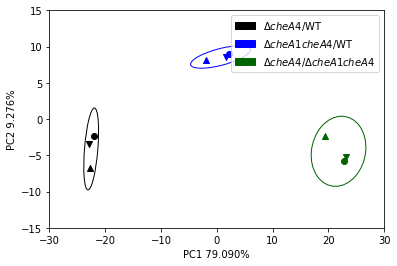

In [138]:
black_patch = mpatches.Patch(color='k', label='\u0394$cheA4$/WT')
blue_patch = mpatches.Patch(color='b', label='\u0394$cheA1cheA4$/WT')
green_patch = mpatches.Patch(color='darkgreen', label='\u0394$cheA4$/\u0394$cheA1cheA4$')

ax = plt.subplot(111)
color = ['k', 'b' ,'darkgreen']
marker = [ "o", "v", "^", "s", "p","D"]


for i2,val2 in enumerate(color):
    ax.scatter(x = PCA1_A4sp7[i2], y= PCA2_A4sp7[i2], color = color[0], marker = marker[i2])
    ax.scatter(x = PCA1_A1A4sp7[i2], y= PCA2_A1A4sp7[i2], color = color[1], marker = marker[i2])
    ax.scatter(x = PCA1_A1A4A4[i2], y= PCA2_A1A4A4[i2], color = color[2], marker = marker[i2])
plt.ylabel('PC2' + ' ' + str('%.3f' %(pca.explained_variance_ratio_[1]*100)) + '%')
plt.xlabel('PC1' + ' ' + str('%.3f' %(pca.explained_variance_ratio_[0]*100)) + '%')

ell_A4sp7.set_edgecolor('k')
ell_A4sp7.set_facecolor('none')
ax.add_artist(ell_A4sp7)

ell_A1A4sp7.set_edgecolor('b')
ell_A1A4sp7.set_facecolor('none')
ax.add_artist(ell_A1A4sp7)

ell_A1A4A4.set_edgecolor('darkgreen')
ell_A1A4A4.set_facecolor('none')
ax.add_artist(ell_A1A4A4)
plt.ylim((-15,15))
plt.xlim((-30,30))
plt.legend(handles=[black_patch, blue_patch, green_patch])